# ReadThreeFishStimliParallelAsymmetrical

In [1]:
# import system libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt### virtual fish swims with 0.12 m  circle without background
import seaborn as sns
from scipy.signal import find_peaks
%matplotlib inline

In [2]:
dfe  = pd.read_csv('../Data/fish/LRD12=0.09_LRD23=0.03.csv')
xse  = dfe['left-right position'].values
yse  = dfe['distance lag'].values
print(dfe.head())

   Unnamed: 0  distance lag  left-right position
0           0     -0.045610             0.045920
1           1     -0.045365             0.045663
2           2     -0.045157             0.045435
3           3     -0.044996             0.045234
4           4     -0.044870             0.045058


In [3]:
fn = 'geometry'
df = pd.read_csv('../Data/fish/'+fn+'.csv')
print(df.head())
print(df.keys())
print(np.max(df[' x'].values))

   time         x        y   centre_left_distance   centre_right_distance   nu
0    10 -0.000117  503.095                    450                     150   75
1    20 -0.000117  507.208                    450                     150   75
2    30 -0.000117  511.253                    450                     150   75
3    40 -0.000117  515.437                    450                     150   75
4    50 -0.000117  519.621                    450                     150   75
Index(['time', ' x', ' y', ' centre_left_distance', ' centre_right_distance',
       ' nu'],
      dtype='object')
0.0782438


In [4]:
a_lrds = df[' centre_right_distance'].values

s_lrds = np.unique(a_lrds)

Results = []
Results.append([])

for ilrd, lrd in enumerate(s_lrds):
    xss = df[' x'][a_lrds==lrd].values
    yss = df[' y'][a_lrds==lrd].values
    
yss  = 0.0002*yss - 0.1

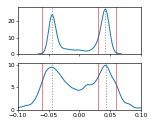

In [5]:

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, sharey='row', figsize=(0.8*7*1/2.54,0.8*2*3/2.54))

ax = axs[1]
sns.distplot(xse,ax=ax,rug_kws=dict(rasterized=True),hist=False)

ax.axvline(-0.06,ls='-',color='r',alpha=0.5)
ax.axvline(0.03,ls='-',color='r',alpha=0.5)
ax.axvline(0.06,ls='-',color='r',alpha=0.5)

tx = ax.lines[0].get_xdata()
ty = ax.lines[0].get_ydata()

peaks = find_peaks(ty)

itext = 0
for peak in peaks[0]:
    if ty[peak] > 8:
        ax.axvline(tx[peak],ls=':',color='0.2',alpha=0.5)
        itext+=1
        
ax = axs[0]
sns.distplot(yss,ax=ax,rug_kws=dict(rasterized=True),hist=False)

ax.axvline(-0.06,ls='-',color='r',alpha=0.5)
ax.axvline(0.03,ls='-',color='r',alpha=0.5)
ax.axvline(0.06,ls='-',color='r',alpha=0.5)

tx = ax.lines[0].get_xdata()
ty = ax.lines[0].get_ydata()

peaks = find_peaks(ty)

itext = 0
for peak in peaks[0]:
    if ty[peak] > 20:
        ax.axvline(tx[peak],ls=':',color='0.2',alpha=0.5)
        itext+=1
plt.xlim([-0.1,0.1])

plt.show()